<a href="https://colab.research.google.com/github/nklsKrmnn/LSC_Sentiment_Analysis/blob/main/Projekt_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/LSC_Sentiment_Analysis'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/LSC_Sentiment_Analysis


In [3]:
try:
  import json
except:
  %pip install -q json
  import json

try:
  import logging
except:
  %pip install -q logging
  import logging

try:
  import sys
except:
  %pip install -q sys
  import sys

try:
  import os
except:
  %pip install -q os
  import os

try:
  import pandas as pd
except:
  %pip install -q pandas
  import pandas as pd

try:
  import torch
  from torch.utils.data import DataLoader
  import torch.nn as nn
  import torch.optim as optim
  from torchsummary import summary
except:
  %pip install -q torch
  import torch
  from torch.utils.data import DataLoader
  import torch.nn as nn
  import torch.optim as optim
  from torchsummary import summary

try:
  from sklearn.model_selection import train_test_split
except:
  %pip install -q sklearn
  from sklearn.model_selection import train_test_split

try:
  import transformers
  from transformers import BertTokenizer, BertModel, BertConfig
except:
  %pip install -q transformers
  import transformers
from transformers import BertTokenizer, BertModel, BertConfig


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00


# 1. Pre-trained BERT Model

## 1.1 Training aller Parameter

In [4]:
from models.bert import BERTClass

In [5]:
model = BERTClass()
model.load_state_dict(torch.load("./runs/model_saves/best_model_BERT_SM - 2023-06-28 22-08-32.387422_.pt"))
print(model)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [13]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {total_params}")
print(f"Number of parameters: {trainable_params}")

Number of parameters: 109484547
Number of parameters: 109484547


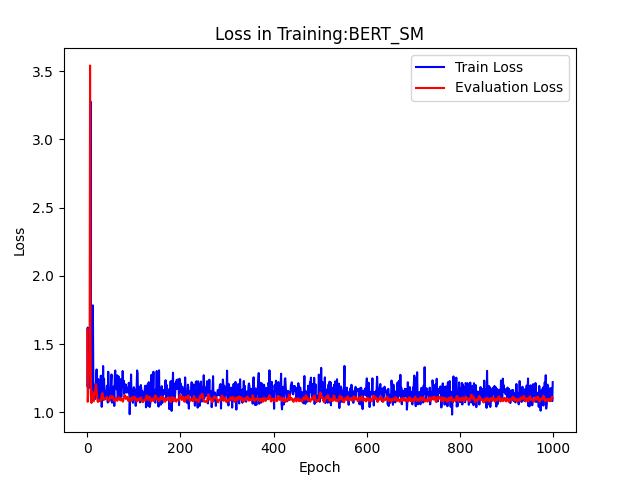